From Kai Zhangs paper

assume that a typical rate of sea level rise is 10cm/century

assume that a typical error in the water budget is about the same


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
slr = 10.
# convert to mm/day = (cm/century * 10mm/cm * century/100yr * yr/365d)
slrmmd = slr*10/100/365
print('slr in mm/day', slrmmd)

('slr in mm/day', 0.0027397260273972603)


In [14]:
# Lets start by translating that precip amount to kg/m2/year, assuming that water has a density of 1000kg/m3
wflux = 3 # mm/day
wflux = slrmmd
wfluxmks = wflux/1000./86400.*1000. # mm/d * 1 m/1000mm * d/86400s * 1000 kg/m3 = kg/m2/s
print "water flux in kg/m2/s", wfluxmks

water flux in kg/m2/s 3.17097919838e-08


In [15]:
cplmks = 4.186e3 # approximate heat capacity liq in J/kg/K at STP
print ("cp (J/kg/K) =", cplmks)
cpvmks = 2.0e3 # approximate heat capacity of vapor
cpimks = 2.1e3 # approximate heat capacity of ice
# assume the water vapor enters at the mean temp (288K) for the planet.
eqenwv = cpvmks*wfluxmks*288 # J/kg/K * kg/m2/s * K = J/m2/s = W/m2 (recall W = J/s)
print ("equivalent internal energy at STP (W/m2) =", eqenwv)
lvapmks = 2.5e6
eqenlh = lvapmks*wfluxmks
print ('equivalent as latent heat (W/m2)',eqenlh)
# assume that 3 mm/d goes into atm as vapor, and 2.8 and 0.2 mm/d return as rain and snow respectively. 
# assume the snow falls at about freezing point, and for the moment that the rain falls at the mean temp also



('cp (J/kg/K) =', 4186.0)
('equivalent internal energy at STP (W/m2) =', 0.0182648401826484)
('equivalent as latent heat (W/m2)', 0.07927447995941146)


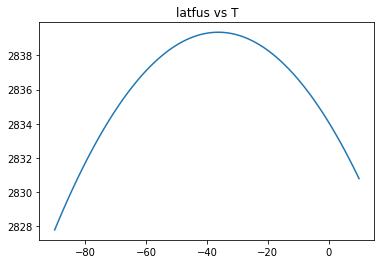

In [5]:
T = np.linspace(-90, 10, 100)
latfus = 2834.1-0.29*T-0.004*T**2
plt.plot(T, latfus)
plt.title('latfus vs T');

$$
evap = rain+snow
$$
so
$$
\begin{align}
Latent\ Heat\ Flux & = (L_f+L_v)evap - L_f rain \\
 & = (L_f+L_v)(rain + snow)-L_f rain \\
 & = (L_f+L_v)rain + (L_f+L_v)snow - L_f rain \\
 & = (L_v) rain + L_f snow + L_v snow \\
 & = (L_v)(rain+snow) + L_f snow \\
 & = L_v evap + l_f snow
\end{align}
$$

In [6]:
# consider the difference in internal energy 
# of a kg of water as vapor and liquid at 300K
t300 = 300.
de = (cplmks-cpvmks)*t300
print "Energy diff between liquid and vapor is ", de

Energy diff between liquid and vapor is  655800.0
